# Feed Forward Neural Network

A Neural Network is essentially a network of mathematical equations. It takes one or more input variables, and by going through a network of equations, results in one or more output variables. You can also say that a neural network takes in a vector of inputs and returns a vector of outputs. A **deep (feedforward) neural network** refers to a neural network that contains not only the input and output layers, but also hidden layers in between

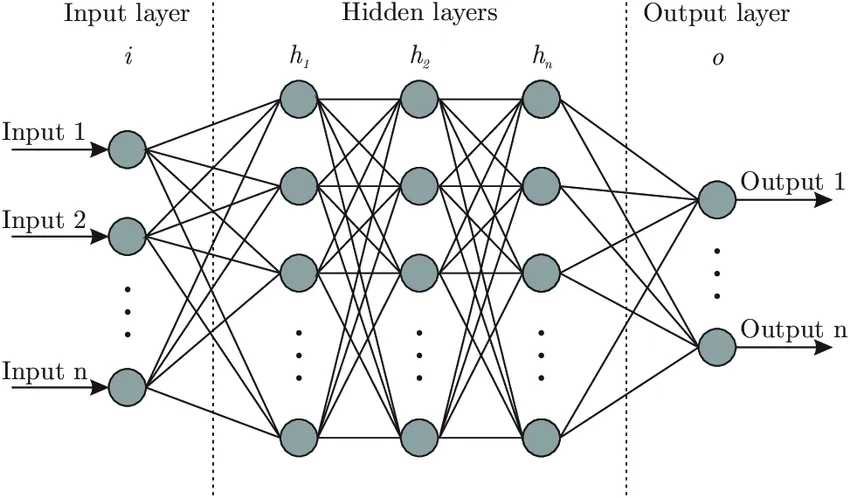

It is composed of four principal objects:

- Layers: all the learning occurs in the layers. There are 3 layers 1) Input 2) Hidden and 3) Output
- feature and label: Input data to the network (features) and output from the network (labels)
- loss function: Metric used to estimate the performance of the learning phase
- optimizer: Improve the learning by updating the knowledge (weights and bias) in the network

A **neural network unit (neuron)** is a primitive neural network that consists of only the “input layer", and an output layer with only one output. It is represented pictorially as follows:

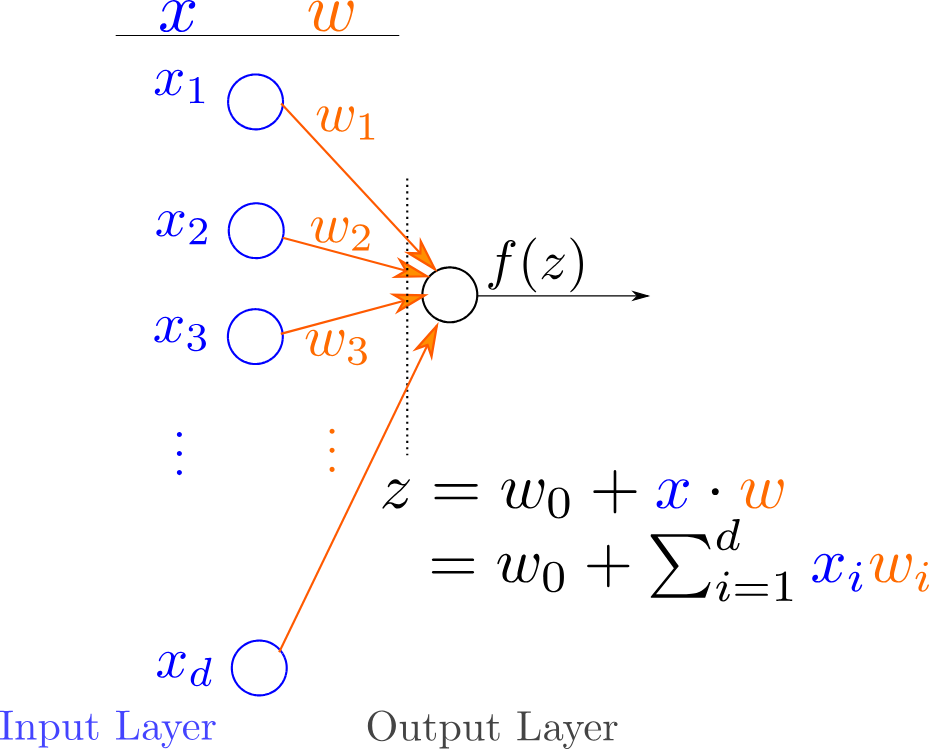

A neural network unit computes a non-linear weighted combination of its input:

$$
\displaystyle  \displaystyle \hat{y} = \displaystyle  f(z)\quad \text {where } z= w_0 + \sum _{i=1}^ d x_ i w_ i
$$

where $w_i$ are numbers called weights , $z$ is a number and is the weighted sum of the inputs $x_i$ and $f$ is generally a non-linear function called the **activation function**. Weights are used to connect each neuron in one layer to every neuron in the next layer. Weight determines the strength of the connection between the neurons.


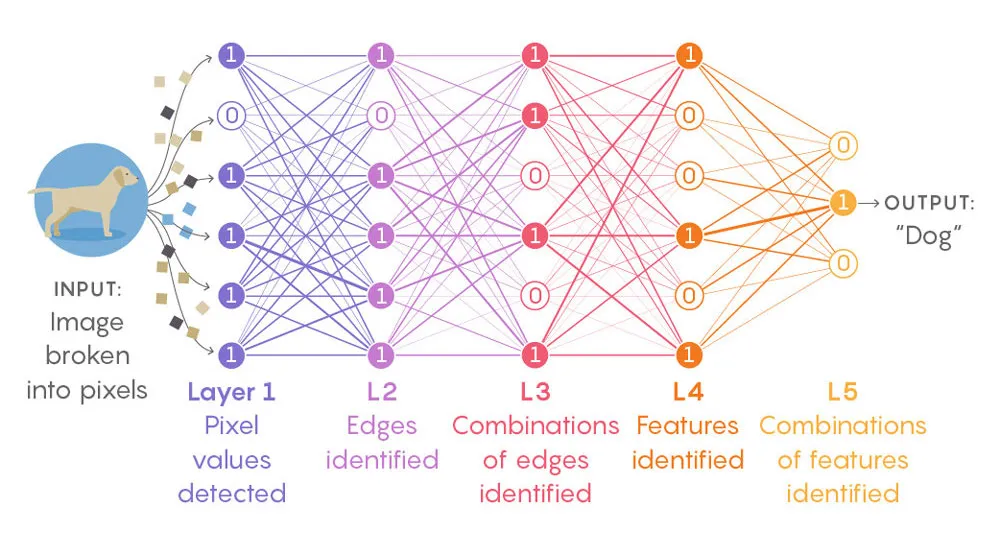

## Structure and Terminology

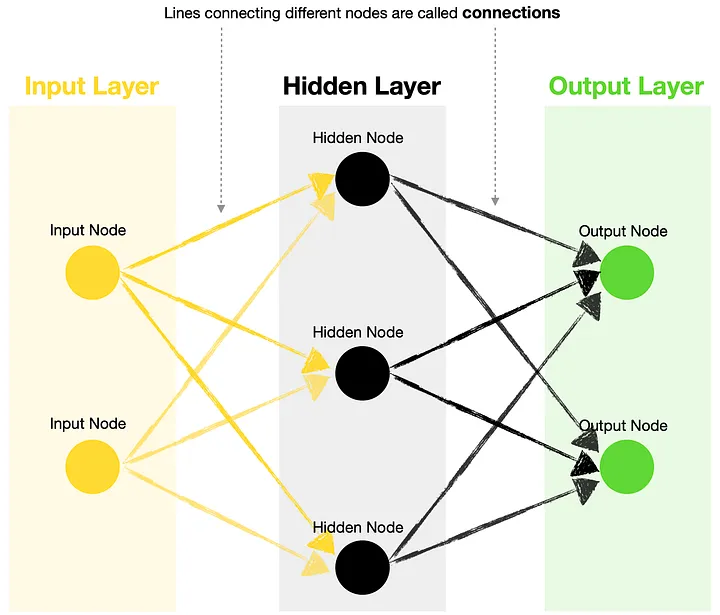

- **Input Layer** — contains one or more input nodes. For example, suppose you want to predict whether it will rain tomorrow and base your decision on two variables, humidity and wind speed. In that case, your first input would be the value for humidity, and the second input would be the value for wind speed.
- **Hidden Layer** — this layer houses hidden nodes, each containing an activation function. 
- **Output Layer** — contains one or more output nodes. Following the same weather prediction example above, you could choose to have only one output node generating a rain probability (where >0.5 means rain tomorrow, and ≤0.5 no rain tomorrow). Alternatively, you could have two output nodes, one for rain and another for no rain. Note, you can use a different activation function for output nodes vs. hidden nodes.
- **Connections** — lines joining different nodes are known as connections. These contain kernels (weights) and biases, the parameters that get optimized during the training of a neural network.

### Parameters and activation functions
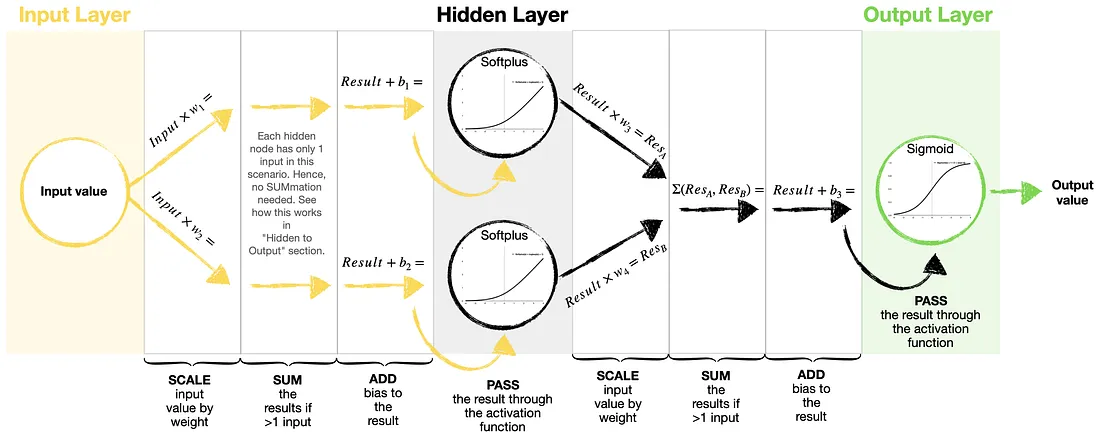

- Kernels (weights) — used to scale input and hidden node values. Each connection typically holds a different weight.
- Biases — used to adjust scaled values before passing them through an activation function.
- Activation functions — An activation function in a neural network is a mathematical function applied to the output of a neuron. These functions determine whether a neuron “fires” or activates, influencing the flow of information throughout the network. Without them, neural networks would simply be linear models, incapable of complex learning.

Here are the shapes and equations of six frequently used activation functions in Neural Networks
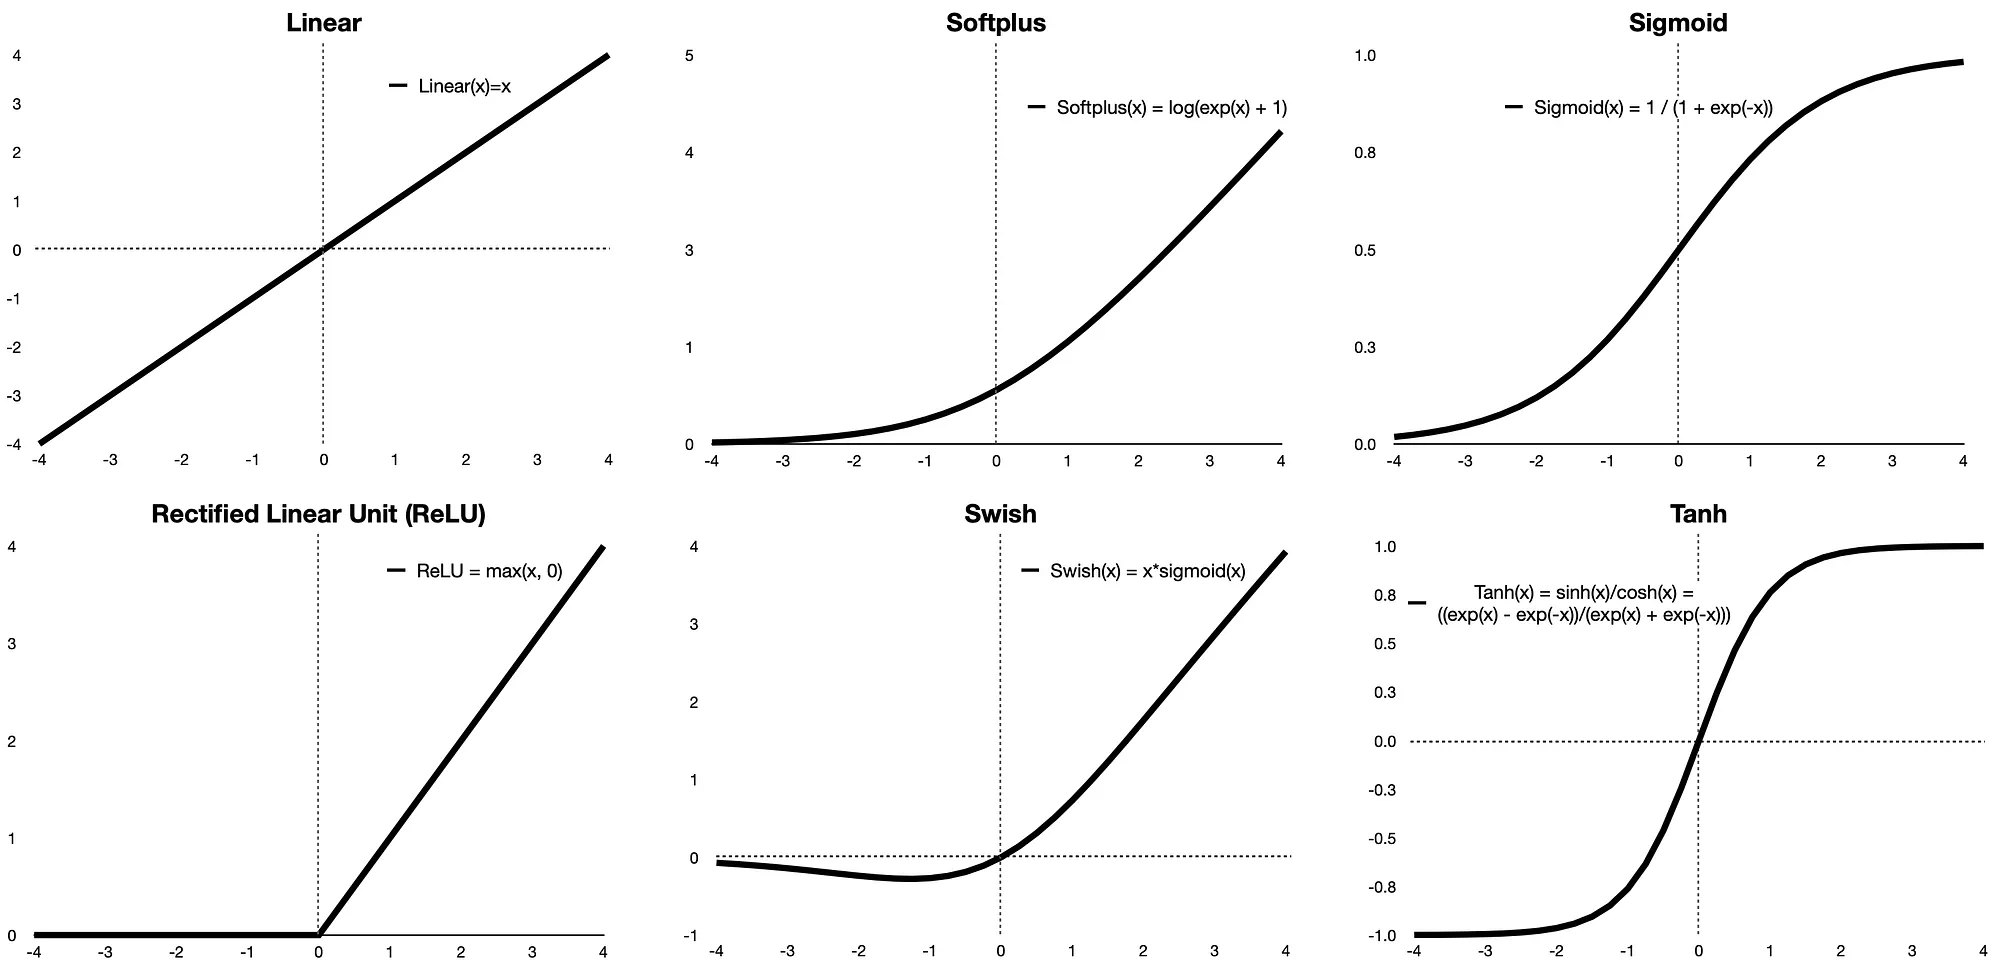

Training Neural Networks involves a complicated process known as backpropagation. Post the training you would have a more optimised Kernels / weights and Biases

There are two main topics to sumarise what happens when we "train" a Neural Network

- **Loss** — represents the “size” of error between the true values/labels and the predicted values/labels. The goal of training a Neural Network is to minimize this loss but adjusting the weights. The smaller the loss, the closer the match between the true and the predicted data. There are many loss functions to choose from, with BinaryCrossentropy, CategoricalCrossentropy, and MeanSquaredError being the most common.

- **Optimizers** — are the algorithms used in backpropagation. The goal of an optimizer is to find the optimum set of kernels (weights) and biases to minimize the loss. Optimizers typically use a gradient descent approach, which allows them to iteratively find the “best” possible configuration of weights and biases. The most commonly used ones are Stochastic Gradient Descent (SGD), ADAM (Adaptive Moment Estimation), and RMSProp (Root Mean Square Propagation).

**Summary:** Feed Forward Neural Networks take one or multiple input values and apply transformations using kernels (weights) and biases before passing results through activation functions. In the end, we get an output (prediction), which is a result of this complex set of transformations optimized through training.

We train Neural Networks by fitting a custom curve through the training data, guided by loss minimization and achieved through parameter (kernels and biases) optimization.



### Building and training Feed Forward Neural Networks in Python
Let’s now have some fun and build our own Neural Network. We will use historic Australian weather data to train a Neural Network that predicts whether it will rain tomorrow or not.

- [Australian weather data from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) (license: Creative Commons, original source of the data: Commonwealth of Australia, Bureau of Meteorology).
- Pandas and Numpy for data manipulation
- [Plotly](https://plotly.com/python/) for data visualizations
- Tensorflow/Keras for Neural Networks
- Scikit-learn library for splitting the data into train-test samples, and for some basic model evaluation

In [111]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 3.4.1
pandas: 2.1.0
numpy: 1.25.2
sklearn: 1.5.1
plotly: 5.17.0


We download and ingest Australian weather data (source: Kaggle). We also do some simple data manipulations and derive new variables for our models.

In [112]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(1)

# Create a flag for RainToday and RainTomorrow, note RainTomorrowFlag will be our target variable
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# Show a snaphsot of data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,1.0,1.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,1.0,1.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,1.0,1.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.0,1.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,1.0,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,1.0,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,1.0,1.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,1.0,1.0,9.4,20.9,No,No,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.0,1.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,1.0,1.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,1.0,1.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,1.0,1.0,12.5,26.1,No,No,0,0


**Using one input (Humidity3pm)**

In short, we are using humidity at 3 pm today to predict whether it will rain tomorrow or not. Our Neural Network has a simple structure (1–2–1) analyzed earlier in this article: one input node, two hidden nodes, and one output node.

A couple of things to note:

- The below code performs validation twice, once on a portion of X_train data (see validation_split in step 5) and another time on a test sample created in step 2. Of course, there is no need to do it twice, so feel free to use either method to validate your model.
- The data was imbalanced (more sunny days than rainy days), so I’ve adjusted classes_weight in step 5.

In [149]:
##### Step 1 - Select data for modeling
X=df[['Humidity3pm']]
y=df['RainTomorrowFlag'].values

##### Step 2 - Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_test.isnull().sum())

##### Step 3 - Specify the structure of a Neural Network
model = Sequential(name="Model-with-One-Input") # Model
model.add(Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))


##### Step 4 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=1 # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 5 - Fit keras model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=3, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
        #   validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3 # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
         )


##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Humidity3pm    0
dtype: int64
Epoch 1/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 9s 837us/step - Accuracy: 0.7008 - Precision: 0.1801 - Recall: 0.1022 - loss: 0.5828
Epoch 2/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 8s 823us/step - Accuracy: 0.7858 - Precision: 0.7788 - Recall: 0.0481 - loss: 0.4482
Epoch 3/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - Accuracy: 0.8147 - Precision: 0.7859 - Recall: 0.2425 - loss: 0.4367 - val_Accuracy: 0.8239 - val_Precision: 0.7032 - val_Recall: 0.3682 - val_loss: 0.4318
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 2s 592us/step
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step

-------------------- Model Summary --------------------


Model: "Model-with-One-Input"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)


-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[-0.1276369  -0.04210727]]
  --Biases:  [1.5947248 2.5589654]
Layer:  Output-Layer
  --Kernels (Weights):  [[ 2.9174864]
 [-2.8691423]]
  --Biases:  [1.2080784]

---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     88249
           1       0.70      0.36      0.48     25505

    accuracy                           0.82    113754
   macro avg       0.77      0.66      0.69    113754
weighted avg       0.81      0.82      0.80    113754


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     22067
           1       0.71      0.37      0.49      6372

    accuracy                           0.82     28439
   macro avg       0.77      0.66      0.69     28439
weighted avg       0.81      0.82 

Let’s now plot the prediction curve on a chart.

In [150]:
# Create 100 evenly spaced points from smallest X to largest X
X_range = np.linspace(X.min(), X.max(), 100)
# Predict probabilities for rain tomorrow
y_predicted = model.predict(X_range.reshape(-1, 1))

# Create a scatter plot
fig = px.scatter(x=X_range.ravel(), y=y_predicted.ravel(), 
                 opacity=0.8, color_discrete_sequence=['black'],
                 labels=dict(x="Value of Humidity3pm", y="Predicted Probability of Rain Tomorrow",))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Feed Forward Neural Network (1 Input) Model Results", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=7))

fig.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


**Using two inputs (WindGustSpeed and Humidity3pm)**

Let’s see how the network and predictions change when we use two inputs (WindGustSpeed and Humidity3pm) to train a Neural Network that has a 2–2–1 structure.

In [153]:
##### Step 1 - Select data for modeling
X=df[['WindGustSpeed', 'Humidity3pm']]
y=df['RainTomorrowFlag'].values


##### Step 2 - Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a neural network
model2 = Sequential(name="Model-with-Two-Inputs") # Model
model2.add(Input(shape=(2,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model2.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model2.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))


##### Step 4 - Compile the keras model
model2.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=1 # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 5 - Fit keras model on the dataset
model2.fit(X_train, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=3, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
         )


##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model2.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model2.predict(X_test) > 0.5).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model2.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model2.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 10s 868us/step - Accuracy: 0.5804 - Precision: 0.2369 - Recall: 0.4047 - loss: 1.0628
Epoch 2/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 7s 758us/step - Accuracy: 0.7630 - Precision: 0.4761 - Recall: 0.5641 - loss: 0.2281
Epoch 3/3
9101/9101 ━━━━━━━━━━━━━━━━━━━━ 9s 980us/step - Accuracy: 0.7917 - Precision: 0.5293 - Recall: 0.6075 - loss: 0.2135 - val_Accuracy: 0.8219 - val_Precision: 0.6111 - val_Recall: 0.5604 - val_loss: 0.4631
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 2s 594us/step
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step

-------------------- Model Summary --------------------


Model: "Model-with-Two-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)


-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[-0.25535843  0.27722198]
 [ 0.01357994  0.45478094]]
  --Biases:  [ 0.15677758 -4.0094385 ]
Layer:  Output-Layer
  --Kernels (Weights):  [[0.7409634 ]
 [0.09198724]]
  --Biases:  [-3.5244422]

---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     88249
           1       0.60      0.55      0.58     25505

    accuracy                           0.82    113754
   macro avg       0.74      0.72      0.73    113754
weighted avg       0.81      0.82      0.82    113754


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22067
           1       0.61      0.56      0.58      6372

    accuracy                           0.82     28439
   macro avg       0.74      0.73      0.73     28439
we

In [154]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].min() - margin, X.iloc[:, 0].max() + margin
    y_min, y_max = X.iloc[:, 1].min() - margin, X.iloc[:, 1].max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate Neural Network predictions on the grid
    Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'], height=900, width=1000)

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with FF Neural Network Prediction Surface",
                      paper_bgcolor = 'white',
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=0.75, y=-1.75, z=1)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='FF NN Prediction Plane',
                              colorscale='Bluered',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig


# Call the above function
fig = Plot_3D(X, X_test, y_test, model2, x1='WindGustSpeed', x2='Humidity3pm', mesh_size=1, margin=0)

419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


Exploring alternate analysis 
[Medium](https://medium.com/@fawadali1234567/rainfall-prediction-using-ai-and-machine-learning-models-part-1-985a52607076)

In [142]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

file_path = 'weatherAUS.csv' 
data = pd.read_csv(file_path)
data.head().T


# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

# Missing values in categorical variables
for i in object_cols:
    print(i, data[i].isnull().sum())


# Missing values in numeric variables
for i in num_cols:
    print(i, data[i].isnull().sum())

# Filling missing values with mode of the column in value
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)


# Filling missing values with median of the column in value
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

data['RainTodayFlag']=data['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
data['RainTomorrowFlag']=data['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267
MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 